In [1]:
import pandas as pd
import os
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt

In [3]:
def feature_extraction(root_folder,filename,  column):
    features_extract = pd.DataFrame(columns=['ID', 'Task', 'Average', 'Max', 'Min', 'Median', 'Std'])  # DataFrame to store the EDA data

    # Recursive traversal of all files in the root folder
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an EDA data file
            if file.endswith(filename):  #find all the RR file: "_rr_filtered.csv"
                # Extract the individual ID and task from the file name
                file_parts = file.split('_')
                id = file_parts[0]  # Assuming the individual ID is the first part of the file name
                task = file_parts[1]  # Assuming the task is the second part of the file name

                # Read the EDA data from the file and add it to the DataFrame
                try:
                    rr_data = pd.read_csv(os.path.join(root, file),  sep=';')
                    # Calcule la moyenne des valeurs de la troisième colonne du fichier rr_data
                    rr_mean = rr_data.iloc[:, column].mean()
                    rr_max=rr_data.iloc[:,column].max()
                    rr_min = rr_data.iloc[:,column].min()
                    rr_median = rr_data.iloc[:,column].median()
                    rr_std = rr_data.iloc[:,column].std()
                    # Crée un DataFrame avec la moyenne des valeurs RR pour chaque fichier
                    df = pd.DataFrame({'ID': id, 'Task': task, 'Average': rr_mean, 'Max': rr_max, 'Min': rr_min, 'Median': rr_median, 'Std': rr_std}, index=[0])
                    
                    features_extract= pd.concat([features_extract, df], ignore_index=True)
                except Exception as e:
                    print(f"Error reading file {file}: {e}")

    return features_extract

In [4]:
root_filtered=r"C:\Users\lexan\Documents\ISMIN 2023-2024\projet ecole\data_rr_filtered"

In [5]:
filename='Baseline_rr_filtered.csv'

In [5]:
features_filtered = feature_extraction(root_filtered, filename,1)

C:\Users\lexan\AppData\Local\Temp\ipykernel_31920\1106703070.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_extract= pd.concat([features_extract, df], ignore_index=True)


In [6]:
features_filtered.head(10)

,ID,Task,Average,Max,Min,Median,Std
0,2ea4,Baseline,-27.506340,17159.898188,-14472.777702,-1109.175627,4762.386892
1,2hpu,Baseline,-13.711056,5111.554910,-4295.438992,6.161302,1708.617250
2,2z7d,Baseline,3.228848,3249.542438,-3194.280129,-52.876586,1283.631052
3,37ir,Baseline,-15.828967,8870.197176,-7009.417946,-331.222113,3028.322339
4,45lx,Baseline,15.078720,10236.202946,-8136.784198,-237.160928,3440.846610
5,4e8r,Baseline,2.787456,10264.193937,-8471.287178,-78.864401,3442.268225
6,4woj,Baseline,-5.528163,7366.354067,-5080.630210,1.312952,2231.852324
7,5f7t,Baseline,31.428370,8784.330840,-9281.128814,-268.345186,2658.595066
8,6g6y,Baseline,-20.444536,8222.692149,-9597.463160,244.163930,3327.933681
9,6k5f,Baseline,-37.102419,16725.191109,-8747.378028,-822.108887,4345.235476


In [8]:
features_clean= feature_extraction(root_filtered, filename, 3)

C:\Users\lexan\AppData\Local\Temp\ipykernel_31920\1106703070.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_extract= pd.concat([features_extract, df], ignore_index=True)


In [9]:
features_clean.head(10)

,ID,Task,Average,Max,Min,Median,Std
0,2ea4,Baseline,-61.454805,25487.075028,-18605.278832,-1761.192022,7225.104718
1,2hpu,Baseline,-17.849476,7894.348413,-6989.668604,-451.901977,2977.104861
2,2z7d,Baseline,6.228335,7517.090521,-5842.190494,105.322910,2101.326205
3,37ir,Baseline,-34.823996,13058.792188,-10483.271308,-471.181052,5103.888156
4,45lx,Baseline,57.634644,21632.907135,-9781.535819,-1223.099188,5626.561722
5,4e8r,Baseline,15.125520,22397.779749,-12235.654510,-10.861636,5295.243361
6,4woj,Baseline,16.587276,11941.799217,-7305.678238,-452.733703,3569.162223
7,5f7t,Baseline,100.656368,18177.386477,-21951.902870,-562.467302,4781.302491
8,6g6y,Baseline,-38.743611,10948.251257,-11927.489338,237.717725,4386.621375
9,6k5f,Baseline,-64.615991,28269.043155,-6652.035565,-1984.907514,5957.251774


In [6]:
from scipy import signal

def calculate_psd(respiration_rate, fs, fmin, fmax):
    f, Pxx = signal.welch(respiration_rate, fs=fs)
    print(f)
    psd = Pxx[(f >= fmin) & (f <= fmax)]
    return f, Pxx

In [7]:
root_onfile = r"C:\Users\lexan\Documents\ISMIN 2023-2024\projet ecole\data_rr_filtered\2ea4\2ea4_Video1_rr_filtered.csv"

In [8]:
rr_data=pd.read_csv(root_onfile, sep=';')

In [9]:
frequencies, psd= calculate_psd(rr_data['rr_filtered'], 1, 0.1 , 0.2)
print(frequencies)
print(psd)

[0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32421875
 0.328125   0.33203125 0.3359375  0.33984375 0.34375    0.3476

(4e-09, 20000000.0)

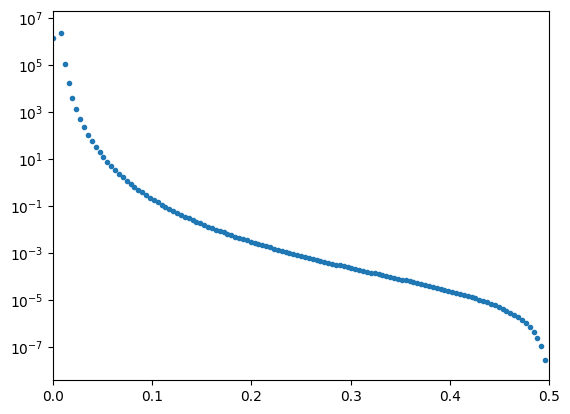

In [14]:
plt.semilogy(frequencies, psd, '.')
plt.xlim(0, 0.5)
plt.ylim(4e-9,2e7)

[1.42869476e+06 3.77045394e+07 2.23196148e+06 1.09862292e+05
 1.65717769e+04 4.04292696e+03 1.30357348e+03 5.05452413e+02
 2.23586139e+02 1.09206218e+02 5.76302662e+01 3.23624176e+01
 1.91247881e+01 1.17947515e+01 7.54254851e+00 4.97595917e+00
 3.37282008e+00 2.34111512e+00 1.65948361e+00 1.19852361e+00
 8.80242044e-01 6.56329469e-01 4.96123292e-01 3.79727107e-01
 2.93969887e-01 2.29972203e-01 1.81647581e-01 1.44759376e-01
 1.16316840e-01 9.41809930e-02 7.68033874e-02 6.30504238e-02
 5.20834742e-02 4.32759641e-02 3.61555019e-02 3.03628009e-02
 2.56224077e-02 2.17215125e-02 1.84945087e-02 1.58116472e-02
 1.35706144e-02 1.16902354e-02 1.01057261e-02 8.76510578e-03
 7.62644109e-03 6.65573461e-03 5.82529354e-03 5.11245351e-03
 4.49858824e-03 3.96832257e-03 3.50891603e-03 3.10977055e-03
 2.76203656e-03 2.45829976e-03 2.19232633e-03 1.95885751e-03
 1.75344424e-03 1.57230985e-03 1.41223978e-03 1.27048989e-03
 1.14471116e-03 1.03288799e-03 9.33285756e-04 8.44408498e-04
 7.64962924e-04 6.938281

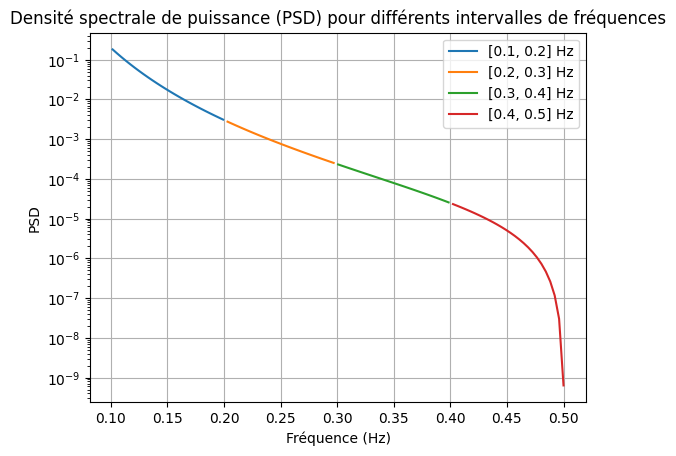

In [10]:
frequency_intervals = [(0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5)]


for fmin, fmax in frequency_intervals:
    f, Pxx = signal.welch(rr_data['rr_filtered'], fs=1)
    mask = (f >= fmin) & (f <= fmax)
    plt.semilogy(f[mask], Pxx[mask], label=f'[{fmin}, {fmax}] Hz')
    print(Pxx)

plt.xlabel('Fréquence (Hz)')
plt.ylabel('PSD')
plt.title('Densité spectrale de puissance (PSD) pour différents intervalles de fréquences')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
signal_neurokit, info_neurokit =nk.rsp_process(rr_data['rr_non_filtered'].values, sampling_rate=500)
signal_filtered=nk.signal_filter(rr_data['rr_non_filtered'].values, sampling_rate=500, lowcut=0.1, highcut=0.4, method="butterworth", order=2, show=False)
print(type(signal_neurokit))


<class 'pandas.core.frame.DataFrame'>


In [17]:
signal_neurokit

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_RVT,RSP_Phase,RSP_Phase_Completion,RSP_Symmetry_PeakTrough,RSP_Symmetry_RiseDecay,RSP_Peaks,RSP_Troughs
0,38785,1779.867493,20729.721036,18.483618,12825.950079,NaN,0.0,0.551033,0.868421,0,0
1,38767,1771.763620,20729.721036,18.483618,12826.171687,NaN,0.0,0.551033,0.868421,0,0
2,38696,1763.621685,20729.721036,18.483618,12826.365519,NaN,0.0,0.551033,0.868421,0,0
3,38644,1755.451871,20729.721036,18.483618,12826.531573,NaN,0.0,0.551033,0.868421,0,0
4,38708,1747.264524,20729.721036,18.483618,12826.669848,NaN,0.0,0.551033,0.868421,0,0
...,...,...,...,...,...,...,...,...,...,...,...
86995,32845,-11.260908,4218.788374,61.099796,1254.563079,NaN,0.0,0.571429,0.688391,0,0
86996,32862,-9.740998,4218.788374,61.099796,1254.596025,NaN,0.0,0.571429,0.688391,0,0
86997,32900,-8.347840,4218.788374,61.099796,1254.629502,NaN,0.0,0.571429,0.688391,0,0
86998,32903,-7.079373,4218.788374,61.099796,1254.663509,NaN,0.0,0.571429,0.688391,0,0


In [21]:
signal_filtered_process, info=nk.rsp_process(rr_data['rr_non_filtered'].values, sampling_rate=500)


In [22]:
signal_filtered_process

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_RVT,RSP_Phase,RSP_Phase_Completion,RSP_Symmetry_PeakTrough,RSP_Symmetry_RiseDecay,RSP_Peaks,RSP_Troughs
0,38785,1779.867493,20729.721036,18.483618,12825.950079,NaN,0.0,0.551033,0.868421,0,0
1,38767,1771.763620,20729.721036,18.483618,12826.171687,NaN,0.0,0.551033,0.868421,0,0
2,38696,1763.621685,20729.721036,18.483618,12826.365519,NaN,0.0,0.551033,0.868421,0,0
3,38644,1755.451871,20729.721036,18.483618,12826.531573,NaN,0.0,0.551033,0.868421,0,0
4,38708,1747.264524,20729.721036,18.483618,12826.669848,NaN,0.0,0.551033,0.868421,0,0
...,...,...,...,...,...,...,...,...,...,...,...
86995,32845,-11.260908,4218.788374,61.099796,1254.563079,NaN,0.0,0.571429,0.688391,0,0
86996,32862,-9.740998,4218.788374,61.099796,1254.596025,NaN,0.0,0.571429,0.688391,0,0
86997,32900,-8.347840,4218.788374,61.099796,1254.629502,NaN,0.0,0.571429,0.688391,0,0
86998,32903,-7.079373,4218.788374,61.099796,1254.663509,NaN,0.0,0.571429,0.688391,0,0


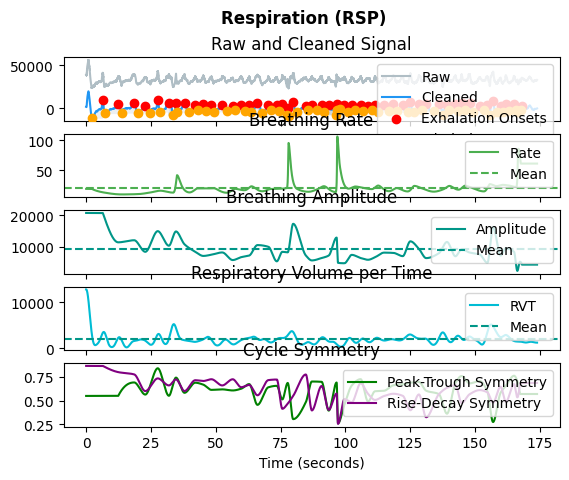

In [23]:
fig = nk.rsp_plot(signal_neurokit, info_neurokit)

In [24]:
interval=nk.rsp_intervalrelated(signal_filtered_process, sampling_rate=500)
pd.set_option('display.max_columns', None)
interval

,RSP_Rate_Mean,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_VLF,RRV_LF,RRV_HF,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RAV_Mean,RAV_SD,RAV_RMSSD,RAV_CVSD,RSP_RVT,RSP_Symmetry_PeakTrough,RSP_Symmetry_RiseDecay,RSP_Phase_Duration_Inspiration,RSP_Phase_Duration_Expiration,RSP_Phase_Duration_Ratio
0,20.63515,1480.898565,3246.117647,1285.192369,1493.794734,0.395917,0.456206,3144.0,916.2468,0.291427,0.004531,0.035319,0.00768,4.598917,0.743084,0.161578,1056.272386,1479.096852,1.400299,0.591515,2.169054,8574.165389,3511.513714,4243.037124,0.494863,1976.362254,0.606743,0.624114,1.963077,1.249098,1.571596


In [11]:
def calcul_psd(signal_filtered):
    frequencies = np.array([0.06, 0.12, 0.24, 0.49, 0.98, 1.95, 3.91])
    power_levels = {}
    
    for i in range(len(frequencies) - 1):
        fmin, fmax = frequencies[i], frequencies[i + 1]
        f, Pxx = signal.welch(signal_filtered, fs=1)
        mask = (f >= fmin) & (f <= fmax)
        power_levels[f'PSD_P{i+1}{i+2}'] = np.trapz(Pxx[mask], f[mask])
    
    # Calculer Relative Power
    relative_power = (power_levels['PSD_P45'] + power_levels['PSD_P56'] + power_levels['PSD_P67']) / \
                     (power_levels['PSD_P12'] + power_levels['PSD_P23'] + power_levels['PSD_P34'])
    
    # Calculer Sum of Powers and Max Power / Sum of Powers ratio
    sum_of_powers = np.sum(list(power_levels.values()))
    max_power = np.max(list(power_levels.values()))
    ratio = max_power / sum_of_powers
    
    # Stocker les résultats dans un DataFrame
    results = pd.DataFrame({
        'PSD_P12':power_levels['PSD_P12'] , 'PSD_P23':  power_levels['PSD_P23'], 'PSD_P34': power_levels['PSD_P34'], 'PSD_P45': power_levels['PSD_P45'], 'PSD_P56': power_levels['PSD_P56'], 'PSD_P67':  power_levels['PSD_P67'], 'Relative Power':  relative_power , 'Sum of Powers': sum_of_powers, 'Max Power / Sum of Powers Ratio': ratio}, index=[0])

    return results

In [12]:
results=calcul_psd(signal_filtered)
results

NameError: name 'signal_filtered' is not defined

In [9]:
"""def rsp_troughs(signal, sampling_rate=500):
    # Input: An array (numpy, dataframe, list) 
    # -> Output : A numpy array
    
    x = np.array(signal)
    print(x)
    
    # distance : minimal horizontal distance (>= 1) in samples between neighbouring peaks. By default = None
    # height : required height of peaks. By default = None
    
    distance = sampling_rate * 3 #If we suppose a healthy person takes up to 20 breaths per minute
    #height = np.std(x)
    #height=height/4
    r_troughs, _ = signal.find_peaks(-x, distance= distance, height=height)
    
    return r_troughs/"""

from scipy.signal import find_peaks

def rsp_troughs(signal, sampling_rate=500):
    # Input: An array (numpy, dataframe, list) 
    # -> Output : A numpy array
    
    x = np.array(signal)
    print(x)
    
    # distance : minimal horizontal distance (>= 1) in samples between neighbouring peaks. By default = None
    # height : required height of peaks. By default = None
    
    distance = sampling_rate * 3 #If we suppose a healthy person takes up to 20 breaths per minute
    height = np.std(x) / 4
    r_troughs, _ = find_peaks(-x, distance=distance, height=height)
    
    return r_troughs
    
def through(signal):
    r_troughs = rsp_troughs(signal,500)
    tti = np.diff(r_troughs)
    if tti.shape[0] != 0:
        meanTT = tti.mean()
        SDTT = tti.std()
        medianTT = np.quantile(tti, 0.5)
        q20TT = np.quantile(tti, 0.2)
        q80TT = np.quantile(tti, 0.8)
        minTT = tti.min()
        maxTT = tti.max()

    results = pd.DataFrame({
        'meanTT': [meanTT], 'stdTT':  [SDTT], 'medianTT': [medianTT], 
        'q20TT': [q20TT], 'q80TT': [q80TT], 'minTT': [minTT], 'maxTT':  [maxTT]
    })

    return results

In [44]:
results=through(signal_filtered)
results

[ 4.17906233e+03  4.20469825e+03  4.23036431e+03 ... -6.05091873e-02
 -5.05273214e-02 -4.17014387e-02]


,meanTT,stdTT,medianTT,q20TT,q80TT,minTT,maxTT
0,2237.815789,583.50898,2095.0,1640.0,2981.8,1537,3216


In [13]:
def concatener():
    signal_filtered_process, info=nk.rsp_process(signal_filtered, sampling_rate=500)
    interval=nk.rsp_intervalrelated(signal_filtered_process, sampling_rate=500)
    results=calcul_psd(signal_filtered)
    featuresTT=through(signal_filtered)
    features= pd.concat([interval,featuresTT, results], axis=1)
    return features
    

In [46]:
featurs=concatener()
featurs

[ 4.17906233e+03  4.20469825e+03  4.23036431e+03 ... -6.05091873e-02
 -5.05273214e-02 -4.17014387e-02]


,RSP_Rate_Mean,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_VLF,RRV_LF,RRV_HF,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RAV_Mean,RAV_SD,RAV_RMSSD,RAV_CVSD,RSP_RVT,RSP_Symmetry_PeakTrough,RSP_Symmetry_RiseDecay,RSP_Phase_Duration_Inspiration,RSP_Phase_Duration_Expiration,RSP_Phase_Duration_Ratio,meanTT,stdTT,medianTT,q20TT,q80TT,minTT,maxTT,PSD_P12,PSD_P23,PSD_P34,PSD_P45,PSD_P56,PSD_P67,Relative Power,Sum of Powers,Max Power / Sum of Powers Ratio
0,16.590589,913.973244,3649.777778,958.795572,923.119763,0.2627,0.250419,3302.0,498.1536,0.150864,0.001144,0.015166,0.00035,43.297065,0.910309,0.021025,652.744244,1188.487632,1.820755,0.600758,2.397895,5719.830555,2427.344487,2687.802733,0.46991,1544.757721,0.53624,0.551808,2.014391,1.621467,1.242327,2237.815789,583.50898,2095.0,1640.0,2981.8,1537,3216,0.023459,0.00085,0.000023,1.980037e-10,0.0,0.0,8.137749e-09,0.024332,0.964122


In [14]:
def feature_extraction(root_folder):

    # Recursive traversal of all files in the root folder
    features = pd.DataFrame()
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an EDA data file
            if file.endswith('_rr_filtered.csv'):  #find all the RR file: "_rr_filtered.csv"
                # Extract the individual ID and task from the file name
                file_parts = file.split('_')
                idy = file_parts[0]  # Assuming the individual ID is the first part of the file name
                task = file_parts[1]  # Assuming the task is the second part of the file name

                # Read the EDA data from the file and add it to the DataFrame
                try:
                    rr_data = pd.read_csv(os.path.join(root, file),  sep=';')
                    # Calcule la moyenne des valeurs de la troisième colonne du fichier rr_data
                    signal_neurokit, info_neurokit=nk.rsp_process(rr_data['rr_non_filtered'].values, sampling_rate=500)
                    signal_filtered=signal_neurokit['RSP_Clean']

                    interval=nk.rsp_intervalrelated(signal_neurokit, sampling_rate=500)
                    results=calcul_psd(signal_filtered)
                    featuresTT=through(signal_filtered)
                    identity=pd.DataFrame({'ID':[idy], 'Task':[task]})
                    feature= pd.concat([identity, interval,featuresTT, results], axis=1)
                    
                    features= pd.concat([features, feature], ignore_index=True)
                    
                    
                except Exception as e:
                    print(f"Error reading file {file}: {e}")

    return features

In [15]:
root_folder=r"C:\Users\lexan\Documents\ISMIN 2023-2024\projet ecole\data_rr_filtered"
features=feature_extraction(root_folder)

Error reading file 2ea4_Baseline_rr_filtered.csv: name 'through' is not defined
Error reading file 2ea4_Breathing_rr_filtered.csv: name 'through' is not defined
Error reading file 2ea4_Counting1_rr_filtered.csv: name 'through' is not defined
Error reading file 2ea4_Counting2_rr_filtered.csv: name 'through' is not defined
Error reading file 2ea4_Counting3_rr_filtered.csv: name 'through' is not defined
Error reading file 2ea4_Math_rr_filtered.csv: name 'through' is not defined
Error reading file 2ea4_Reading_rr_filtered.csv: name 'through' is not defined
Error reading file 2ea4_Relax_rr_filtered.csv: name 'through' is not defined
Error reading file 2ea4_Speaking_rr_filtered.csv: name 'through' is not defined
Error reading file 2ea4_Stroop_rr_filtered.csv: name 'through' is not defined


KeyboardInterrupt: 

In [14]:
features

,ID,Task,RSP_Rate_Mean,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,...,Max Power / Sum of Powers Ratio,RRV_DFA_alpha2,RRV_MFDFA_alpha2_Width,RRV_MFDFA_alpha2_Peak,RRV_MFDFA_alpha2_Mean,RRV_MFDFA_alpha2_Max,RRV_MFDFA_alpha2_Delta,RRV_MFDFA_alpha2_Asymmetry,RRV_MFDFA_alpha2_Fluctuation,RRV_MFDFA_alpha2_Increment
0,2ea4,Baseline,18.820040,1729.673091,3346.235294,1262.699070,1785.551922,0.377349,0.516901,3322.0,...,0.964328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ea4,Breathing,9.134841,3147.454924,6668.800000,2873.843768,3207.075980,0.430939,0.471967,5530.0,...,0.964181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2ea4,Counting1,20.068611,3137.885010,3579.384615,1965.287491,3272.106925,0.549057,0.876655,3240.0,...,0.964221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2ea4,Counting2,10.729364,3508.060351,5840.500000,2448.948637,3784.535525,0.419305,0.600644,6117.0,...,0.964208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2ea4,Counting3,18.722435,3169.011342,3946.600000,2814.128490,3196.177578,0.713051,0.802973,2874.0,...,0.964290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,y9z6,Relax,18.345156,920.709664,3318.558140,760.290461,931.862990,0.229103,0.277443,3174.0,...,0.964167,0.591547,0.607698,0.67483,0.734689,0.28425,-0.298003,-0.401499,0.000016,0.016199
760,y9z6,Speaking,20.378488,1794.525898,3111.875000,1288.179381,1855.096373,0.413956,0.576670,3017.0,...,0.964231,0.591547,0.607698,0.67483,0.734689,0.28425,-0.298003,-0.401499,0.000016,0.016199
761,y9z6,Stroop,26.674089,1992.136318,2819.368421,1261.957219,2049.763819,0.447603,0.706590,2958.0,...,0.964287,0.591547,0.607698,0.67483,0.734689,0.28425,-0.298003,-0.401499,0.000016,0.016199
762,y9z6,Video1,19.449192,1023.628463,3136.075472,795.180866,1033.490257,0.253559,0.326404,2978.0,...,0.964164,0.591547,0.607698,0.67483,0.734689,0.28425,-0.298003,-0.401499,0.000016,0.016199


In [52]:
features.to_csv('features.csv', index=False, sep=';')

In [51]:
features.drop(['RRV_VLF', 'RRV_LFn', 'RRV_HFn', 'RRV_SampEn', 'PSD_P56', 	'PSD_P67'], axis=1, inplace=True)
features

,ID,Task,RSP_Rate_Mean,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,...,q80TT,minTT,maxTT,PSD_P12,PSD_P23,PSD_P34,PSD_P45,Relative Power,Sum of Powers,Max Power / Sum of Powers Ratio
0,2ea4,Baseline,18.820040,1729.673091,3346.235294,1262.699070,1785.551922,0.377349,0.516901,3322.0,...,2783.4,1539,3060,0.446433,0.016087,0.000427,4.027521e-09,8.699746e-09,0.462947,0.964328
1,2ea4,Breathing,9.134841,3147.454924,6668.800000,2873.843768,3207.075980,0.430939,0.471967,5530.0,...,4673.0,1508,6324,0.123218,0.004459,0.000119,1.060471e-09,8.298156e-09,0.127796,0.964181
2,2ea4,Counting1,20.068611,3137.885010,3579.384615,1965.287491,3272.106925,0.549057,0.876655,3240.0,...,2834.4,1620,4253,0.583372,0.021087,0.000560,5.072367e-09,8.383812e-09,0.605019,0.964221
3,2ea4,Counting2,10.729364,3508.060351,5840.500000,2448.948637,3784.535525,0.419305,0.600644,6117.0,...,3462.4,1558,4041,0.420439,0.015203,0.000404,3.655212e-09,8.382621e-09,0.436046,0.964208
4,2ea4,Counting3,18.722435,3169.011342,3946.600000,2814.128490,3196.177578,0.713051,0.802973,2874.0,...,3512.8,1701,5109,0.560563,0.020222,0.000537,4.970113e-09,8.549671e-09,0.581322,0.964290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,y9z6,Relax,18.345156,920.709664,3318.558140,760.290461,931.862990,0.229103,0.277443,3174.0,...,2521.0,1500,4936,0.629723,0.022797,0.000606,5.394497e-09,8.259500e-09,0.653126,0.964167
760,y9z6,Speaking,20.378488,1794.525898,3111.875000,1288.179381,1855.096373,0.413956,0.576670,3017.0,...,3416.0,1511,4596,0.561708,0.020298,0.000539,4.901410e-09,8.413796e-09,0.582544,0.964231
761,y9z6,Stroop,26.674089,1992.136318,2819.368421,1261.957219,2049.763819,0.447603,0.706590,2958.0,...,2868.0,1627,3504,0.355000,0.012808,0.000340,3.147580e-09,8.549764e-09,0.368148,0.964287
762,y9z6,Video1,19.449192,1023.628463,3136.075472,795.180866,1033.490257,0.253559,0.326404,2978.0,...,2762.8,1503,4342,0.824321,0.029845,0.000793,7.056315e-09,8.253402e-09,0.854958,0.964164


In [17]:
filename_label = r"C:\Users\lexan\Documents\ISMIN 2023-2024\projet ecole\data\labels.csv"
label = pd.read_csv(os.path.join(filename_label), sep = ",")
features=pd.read_csv('features.csv', sep=';')
dataframe = features.drop(['ID','Task'], axis=1)
label

,subject/task;binary-stress;affect3-class
0,2ea4_Baseline;0;0
1,2ea4_Breathing;0;0
2,2ea4_Counting1;1;2
3,2ea4_Counting2;1;2
4,2ea4_Counting3;1;2
...,...
759,y9z6_Relax;0;0
760,y9z6_Speaking;1;2
761,y9z6_Stroop;1;1
762,y9z6_Video1;1;1


In [18]:
features_dataset = pd.read_csv('feature_dataset.csv', sep = ';')
features_two= pd.concat([features, features_dataset], axis=1)

features_two

,ID,Task,RSP_Rate_Mean,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,...,SD2,SD1SD2,ApEn,SampEn,MeanPR,PR sd,MeanST,ST sd,MeanPT,PT sd
0,2ea4,Baseline,18.820040,1729.673091,3346.235294,1262.699070,1785.551922,0.377349,0.516901,3322.0,...,87.482701,0.342352,0.586069,1.694596,34.819672,13.031498,153.305085,77.920919,221.423729,81.178022
1,2ea4,Breathing,9.134841,3147.454924,6668.800000,2873.843768,3207.075980,0.430939,0.471967,5530.0,...,234.221629,0.323060,0.646246,0.800621,37.926554,19.153859,134.344633,64.145578,217.519774,68.962373
2,2ea4,Counting1,20.068611,3137.885010,3579.384615,1965.287491,3272.106925,0.549057,0.876655,3240.0,...,91.522588,0.331833,0.428372,1.098612,35.102941,11.682239,107.753846,65.602305,183.338462,74.472768
3,2ea4,Counting2,10.729364,3508.060351,5840.500000,2448.948637,3784.535525,0.419305,0.600644,6117.0,...,100.579876,0.414208,0.453431,1.440362,34.241935,11.637932,164.016393,63.993210,225.114754,68.082182
4,2ea4,Counting3,18.722435,3169.011342,3946.600000,2814.128490,3196.177578,0.713051,0.802973,2874.0,...,99.302328,0.306771,0.467286,1.717651,35.062500,10.477468,154.265625,65.557285,219.796875,67.997973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,y9z6,Relax,18.345156,920.709664,3318.558140,760.290461,931.862990,0.229103,0.277443,3174.0,...,76.905920,0.625329,0.791178,1.786369,39.236111,10.370221,114.965278,68.581907,173.159722,67.723361
760,y9z6,Speaking,20.378488,1794.525898,3111.875000,1288.179381,1855.096373,0.413956,0.576670,3017.0,...,57.140309,0.500208,0.569339,1.921813,46.692308,22.424522,139.015152,58.019195,207.769231,64.092666
761,y9z6,Stroop,26.674089,1992.136318,2819.368421,1261.957219,2049.763819,0.447603,0.706590,2958.0,...,103.599049,0.377303,0.677082,1.927892,41.290323,15.013314,107.476190,76.871746,166.854839,77.240063
762,y9z6,Video1,19.449192,1023.628463,3136.075472,795.180866,1033.490257,0.253559,0.326404,2978.0,...,71.953130,0.579648,0.786761,1.920069,38.257310,15.955105,121.614035,62.247127,180.023392,64.106906


In [19]:
root_directory = r"C:\Users\lexan\Documents\ISMIN 2023-2024\projet ecole\data"
filename_label = "labels.csv"
def read_feature_dataset(root_directory,features, label):

    label_df =_df = pd.read_csv(os.path.join(root_directory, label), sep = ";")

    dataframe = features.drop(['ID','Task'], axis=1)
    dataframe.insert(loc=0, column = 'Stress', value = label_df['binary-stress'])
    
    return dataframe

In [68]:
rr_features = read_feature_dataset(root_directory, features_two, filename_label)
rr_features
rr_features.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
rr_features.dropna(inplace=True)

In [69]:
inputs = rr_features.drop('Stress',axis=1)
target = rr_features['Stress']

In [22]:
import warnings
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [70]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# Création du modèle de régression logistique
model = SVR(kernel="linear")

# Création de l'objet RFE et spécification du nombre de caractéristiques à sélectionner
rfe = RFE(model, n_features_to_select=5, step=1)  # Spécifiez le nombre de caractéristiques souhaitées ici (5 dans cet exemple)
model = LogisticRegression(max_iter=1000) 

# Ajustement du RFE
rfe.fit(x_train, y_train)  # X_train est votre ensemble de données d'entraînement, y_train sont les étiquettes correspondantes
"""
# Résumé des caractéristiques sélectionnées
selected_features = x_train.columns[rfe.support_]
print("Caractéristiques sélectionnées:")
print(selected_features)"""

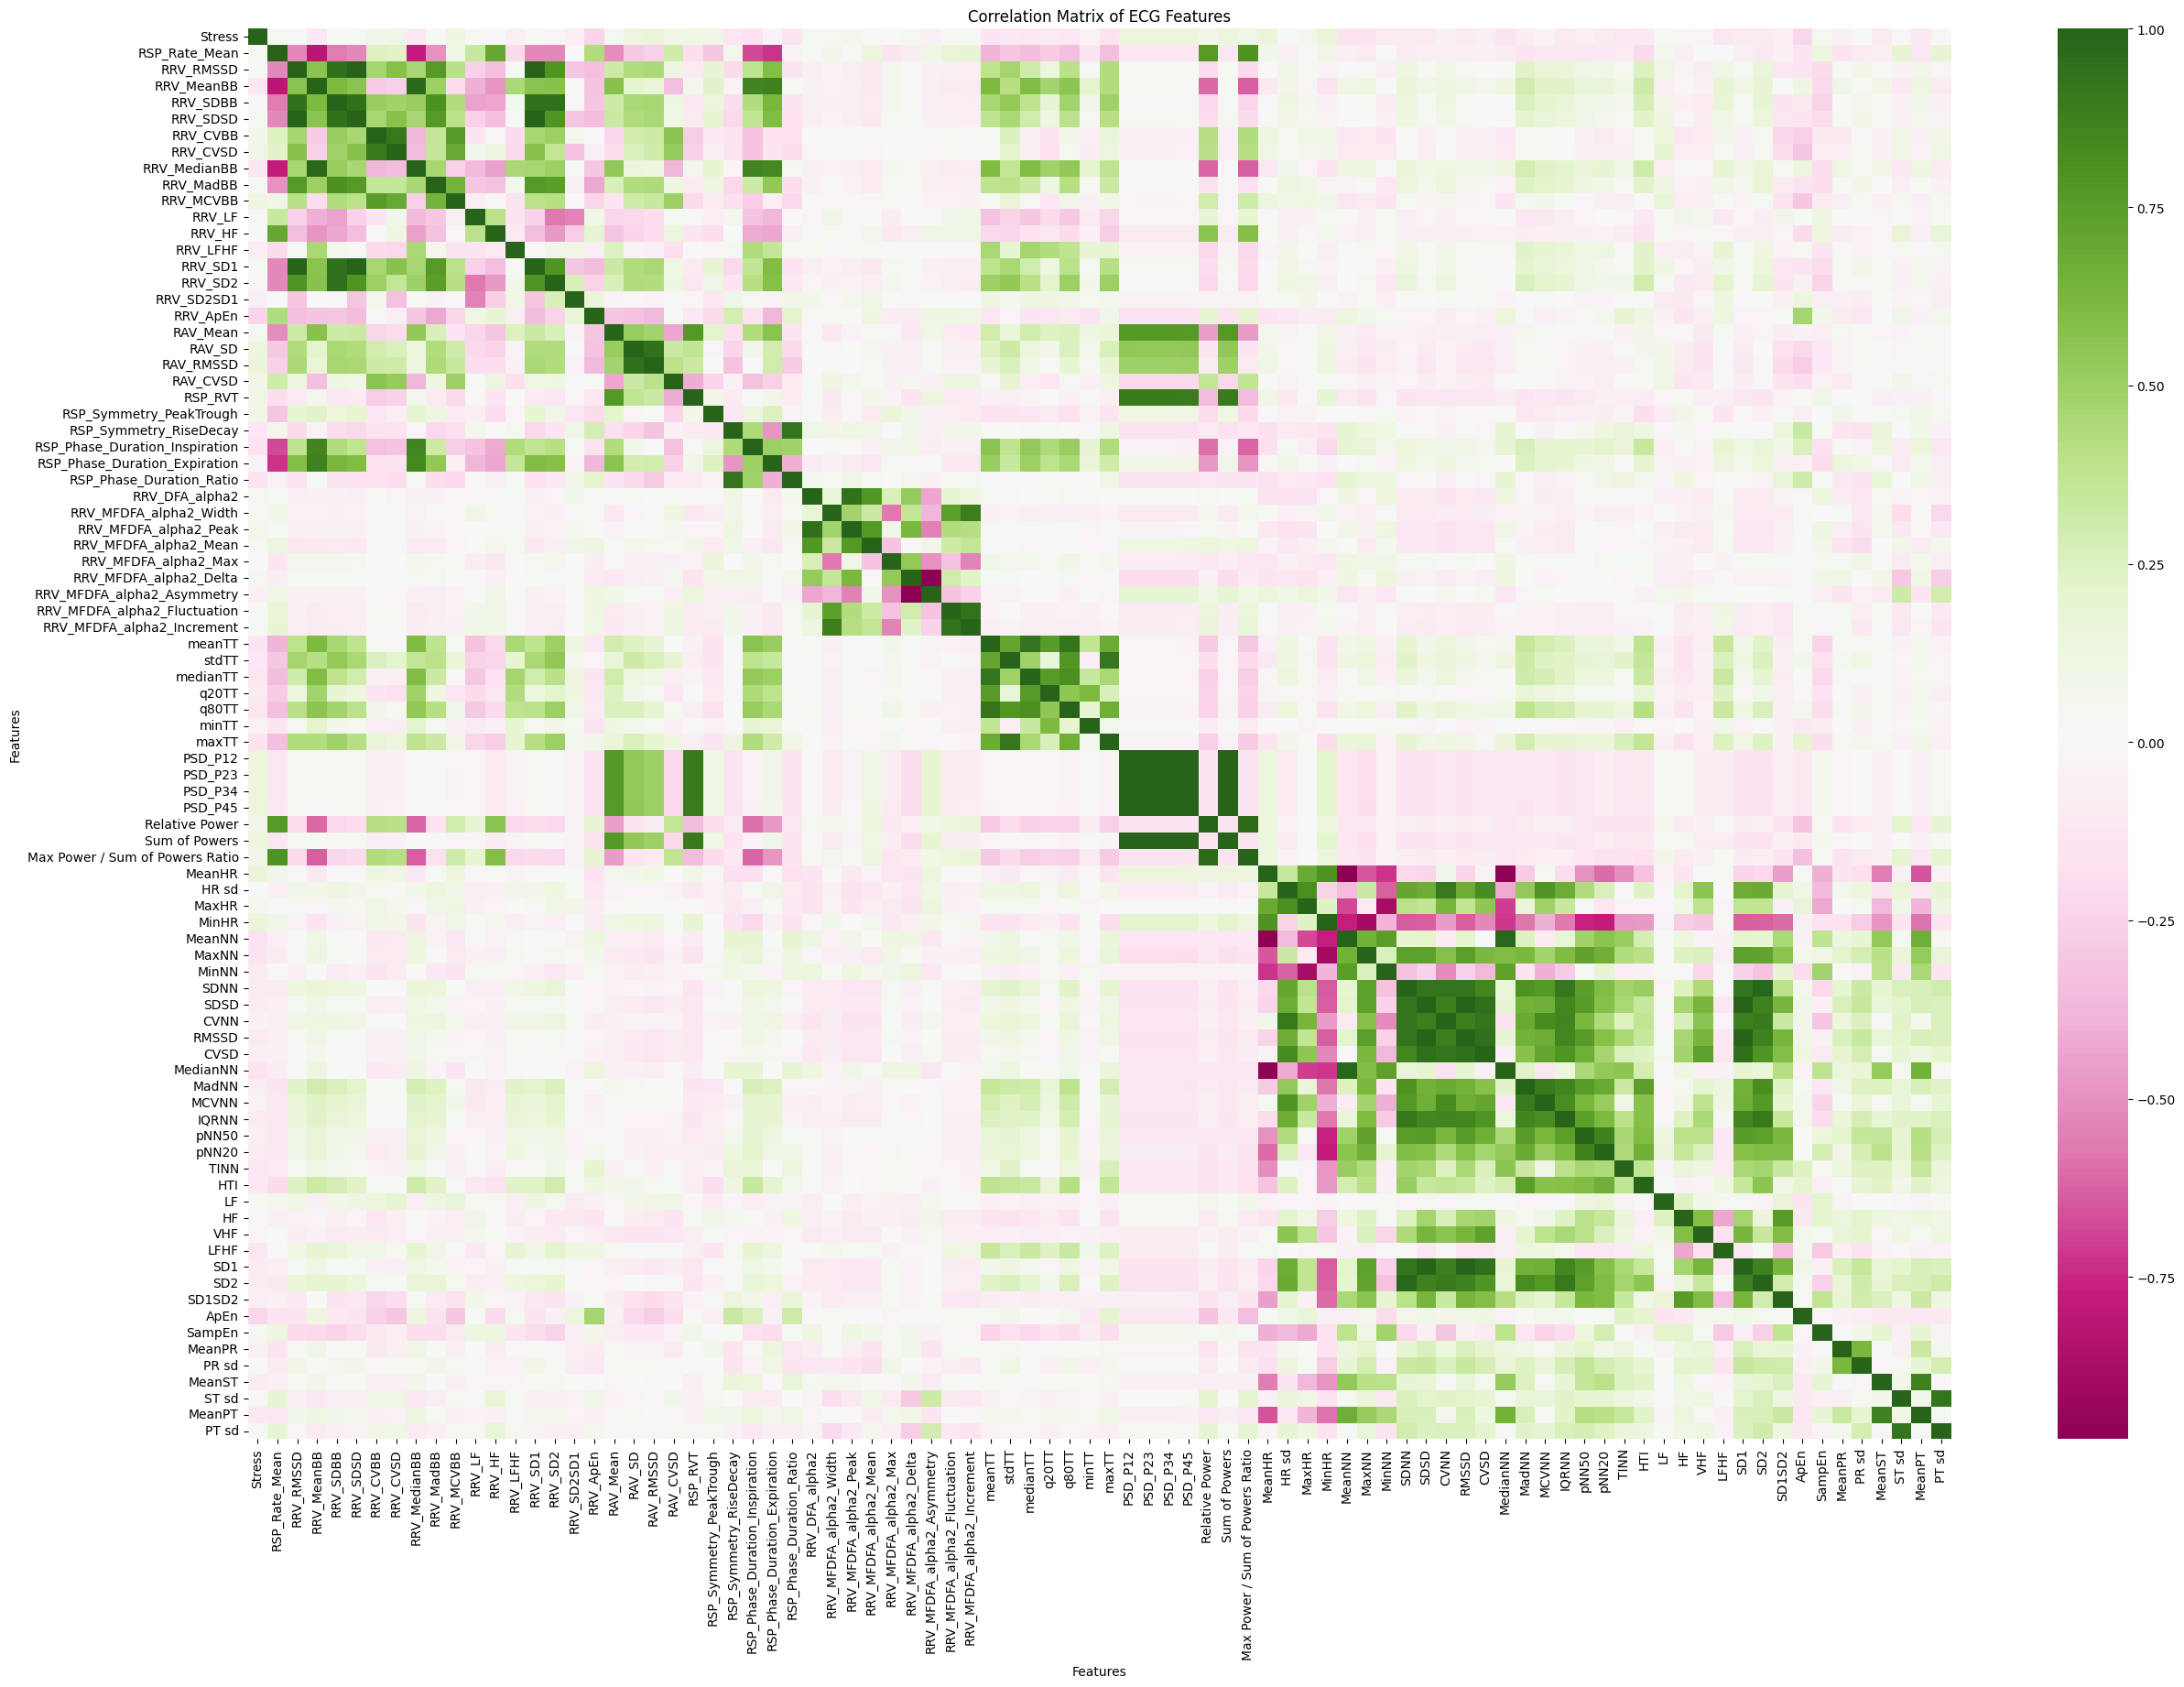

In [24]:
# Calculate the correlation matrix
correlation_matrix = rr_features.corr()
#correlation_matrix = x_train.corr()

# Create a heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', annot_kws=dict(size=15), cmap='PiYG')
plt.title('Correlation Matrix of ECG Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [25]:
def highlight_corr(values):
    color = 'red' if values >=0.9 else ''
    return f'background-color: {color}'
highlighted_corr = correlation_matrix.style.applymap(highlight_corr)
highlighted_corr

C:\Users\lexan\AppData\Local\Temp\ipykernel_23476\3720243371.py:4: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  highlighted_corr = correlation_matrix.style.applymap(highlight_corr)


In [26]:
#selection des motifs avec la matrice de correlation
corr_pairs=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i,j]>0.89:
            corr_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j],correlation_matrix.iloc[i,j]))
corr_pairs

[('RRV_SDBB', 'RRV_RMSSD', 0.9433547086037769),
 ('RRV_SDSD', 'RRV_RMSSD', 0.9992385385736159),
 ('RRV_SDSD', 'RRV_SDBB', 0.9404731492360585),
 ('RRV_CVSD', 'RRV_CVBB', 0.9082037808063215),
 ('RRV_MedianBB', 'RRV_MeanBB', 0.9779653812519521),
 ('RRV_SD1', 'RRV_RMSSD', 0.9992385385736163),
 ('RRV_SD1', 'RRV_SDBB', 0.9404731492360596),
 ('RRV_SD1', 'RRV_SDSD', 1.0000000000000004),
 ('RRV_SD2', 'RRV_SDBB', 0.9470837649634647),
 ('RAV_RMSSD', 'RAV_SD', 0.9421147333430974),
 ('RSP_Phase_Duration_Ratio', 'RSP_Symmetry_RiseDecay', 0.9243289163460456),
 ('RRV_MFDFA_alpha2_Peak', 'RRV_DFA_alpha2', 0.9409818980589053),
 ('RRV_MFDFA_alpha2_Increment',
  'RRV_MFDFA_alpha2_Fluctuation',
  0.9321754769795317),
 ('medianTT', 'meanTT', 0.9239587287257425),
 ('q80TT', 'meanTT', 0.9274469328974556),
 ('maxTT', 'stdTT', 0.9151344364780365),
 ('PSD_P12', 'RSP_RVT', 0.9040060714550044),
 ('PSD_P23', 'RSP_RVT', 0.9045720943621485),
 ('PSD_P23', 'PSD_P12', 0.9999969187721849),
 ('PSD_P34', 'RSP_RVT', 0.90471

In [27]:
features_to_drop = []
for i,j,k in corr_pairs:
    features_to_drop.append(i)
    features_to_drop.append(j)
features_to_drop = list(set(features_to_drop))
features_to_drop

['RSP_Phase_Duration_Ratio',
 'RAV_SD',
 'RRV_MFDFA_alpha2_Peak',
 'MadNN',
 'HR sd',
 'RRV_SDBB',
 'RRV_SDSD',
 'Relative Power',
 'MCVNN',
 'MedianNN',
 'SDNN',
 'RRV_DFA_alpha2',
 'RRV_MFDFA_alpha2_Fluctuation',
 'q80TT',
 'RRV_SD2',
 'CVNN',
 'RSP_RVT',
 'MeanNN',
 'SDSD',
 'RMSSD',
 'RRV_SD1',
 'RRV_CVSD',
 'stdTT',
 'RRV_RMSSD',
 'ST sd',
 'RAV_RMSSD',
 'RRV_MedianBB',
 'medianTT',
 'CVSD',
 'PT sd',
 'maxTT',
 'PSD_P45',
 'RRV_MFDFA_alpha2_Increment',
 'PSD_P12',
 'Sum of Powers',
 'SD2',
 'PSD_P34',
 'RSP_Symmetry_RiseDecay',
 'PSD_P23',
 'Max Power / Sum of Powers Ratio',
 'SD1',
 'RRV_CVBB',
 'meanTT',
 'IQRNN',
 'RRV_MeanBB']

In [29]:
x_train_selected = x_train.drop(features_to_drop,axis=1)
x_test_selected = x_test.drop(features_to_drop,axis=1)
x_train_selected
x_train = x_train.astype('float64')
print(x_train)

     RSP_Rate_Mean    RRV_RMSSD   RRV_MeanBB     RRV_SDBB     RRV_SDSD  \
201      10.858650  5422.975524  6024.148148  3634.264413  5529.216195   
601      23.606238  1474.887792  2634.000000  1420.116897  1506.260074   
438      17.999588  2795.845930  3600.571429  1760.416459  2907.994727   
91       12.885409  3755.209619  4942.275862  2349.945028  3823.955565   
373      15.329972  3174.124604  4300.461538  2520.246305  3315.152371   
..             ...          ...          ...          ...          ...   
71       20.405095  1098.424781  2982.162162   741.943301  1114.001743   
107      32.532678  1199.187327  1917.068966   829.672454  1209.825002   
272      40.830554   881.871677  1692.066667   671.548182   895.597739   
437      13.761261  2288.984084  4563.333333  1557.509713  2326.609366   
103      21.198691  2482.141800  2954.000000  1860.244962  2507.396188   

     RRV_CVBB  RRV_CVSD  RRV_MedianBB  RRV_MadBB  RRV_MCVBB  ...         SD2  \
201  0.603283  0.900206        

In [30]:
#modele avec tous les motifs
logit = RandomForestClassifier()
logit.fit(x_train,y_train)
prediction = logit.predict(x_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        89
           1       0.72      0.78      0.75        64

    accuracy                           0.78       153
   macro avg       0.78      0.78      0.78       153
weighted avg       0.79      0.78      0.79       153



In [31]:
#modele avec la selection des motifs
logitSelected = RandomForestClassifier()
logitSelected.fit(x_train_selected,y_train)
predSelected = logitSelected.predict(x_test_selected)
print(classification_report(y_test,predSelected))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        89
           1       0.69      0.72      0.70        64

    accuracy                           0.75       153
   macro avg       0.74      0.74      0.74       153
weighted avg       0.75      0.75      0.75       153



In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Création de l'instance de modèle de Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()

# Entraînement du modèle
gradient_boosting_model.fit(x_train, y_train)

# Prédiction sur les données de test
gradient_boosting_prediction = gradient_boosting_model.predict(x_test)

# Affichage du rapport de classification
print("Rapport de classification pour Gradient Boosting :")
print(classification_report(y_test, gradient_boosting_prediction))

Rapport de classification pour Gradient Boosting :
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        89
           1       0.65      0.72      0.68        64

    accuracy                           0.72       153
   macro avg       0.71      0.72      0.72       153
weighted avg       0.73      0.72      0.72       153



In [62]:
from sklearn.neural_network import MLPClassifier

# Création de l'instance de modèle de Réseau de Neurones
neural_network_model = MLPClassifier()

# Entraînement du modèle
neural_network_model.fit(x_train, y_train)

# Prédiction sur les données de test
neural_network_prediction = neural_network_model.predict(x_test)

# Affichage du rapport de classification
print("Rapport de classification pour le Réseau de Neurones :")
print(classification_report(y_test, neural_network_prediction))

Rapport de classification pour le Réseau de Neurones :
              precision    recall  f1-score   support

           0       0.70      0.63      0.66        89
           1       0.55      0.62      0.58        64

    accuracy                           0.63       153
   macro avg       0.62      0.63      0.62       153
weighted avg       0.64      0.63      0.63       153



"""    RRV_SD2: C'est la mesure de la dispersion des points d'un nuage de points RR dans l'espace bidimensionnel.

    RRV_SD2SD1: C'est le rapport entre la dispersion SD2 et SD1 des points RR dans l'espace bidimensionnel.

    RRV_ApEn: C'est l'approximation de l'entropie. Elle est utilisée pour mesurer la complexité et la régularité des séries temporelles.

    RRV_SampEn: C'est l'entropie de SampEn. C'est une autre mesure de l'entropie utilisée pour évaluer la régularité et la complexité des séries temporelles.

    RAV_Mean: C'est la moyenne des amplitudes des signaux RAV.

    RAV_SD: C'est l'écart-type des signaux RAV.

    RAV_RMSSD: C'est la racine carrée de la moyenne des carrés des différences successives entre les intervalles RR. C'est une mesure de la variabilité à court terme du rythme cardiaque.

    RAV_CVSD: C'est le coefficient de variation de la durée de l'intervalle RR. Il mesure la variabilité du rythme cardiaque normalisée par la moyenne.

    RSP_RVT: C'est le temps de ventilation respiratoire (Respiratory Variability Time).

    RSP_Symmetry_PeakTrough: C'est la symétrie entre le pic et le creux de la respiration.

    RSP_Symmetry_RiseDecay: C'est la symétrie entre la montée et la descente de la respiration.

    RSP_Phase_Duration_Inspiration: C'est la durée de la phase d'inspiration de la respiration.

    RSP_Phase_Duration_Expiration: C'est la durée de la phase d'expiration de la respiration.

    RSP_Phase_Duration_Ratio: C'est le rapport entre la durée de l'inspiration et celle de l'expiration de la respiration."""

In [26]:
signal_neurokit_500, info_neurokit_500 =nk.rsp_process(rr_data['rr_non_filtered'].values, sampling_rate=500)
signal = np.array(signal_neurokit_500['RSP_Clean'])

{'RSP_Peaks': array([  441,  1443,  1998,  2566,  3218,  3852,  4664,  5196,  5688,
        6188,  7203,  7712,  8256,  9267, 10386, 10879, 11416, 11961,
       13100, 13816, 14718, 15506, 15969, 16418, 17329, 18238, 18978,
       19491, 20325, 21052, 21846, 22604, 23443, 24175, 24983, 25449,
       26255, 27524, 28282, 29139, 29917, 31458, 32332, 33058, 34410,
       35159, 36027, 36787, 37856, 38311, 39942, 41056, 41581, 42387,
       43554, 44091, 45434, 46806, 47414, 48330, 49403, 49836, 51253,
       52434, 52961, 53882, 54385, 55730, 57012, 57477, 59273, 60082,
       61090, 61675, 62552, 63780, 64210, 65052, 65602, 66926, 67629,
       68058, 69621, 70759, 71253, 72443, 73978, 75934, 77420, 78508,
       79552, 79955, 80984, 82090, 82560, 84068, 84513, 85572, 86829],
      dtype=int64), 'RSP_Troughs': array([   41,  1073,  1548,  2132,  2706,  3543,  4033,  4831,  5329,
        5840,  6839,  7332,  7876,  8425,  9958, 10490, 10978, 11868,
       12380, 13273, 14331, 14848, 15810

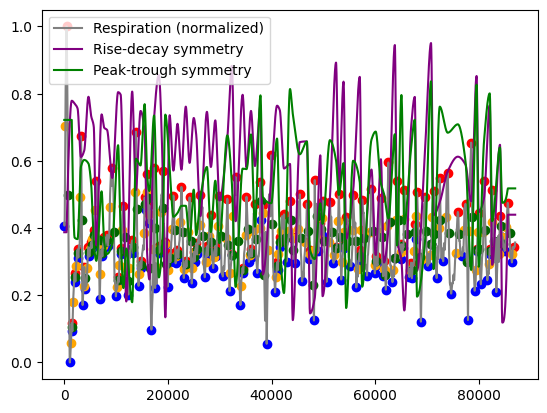

In [27]:
def peak_detection(signal):
    info_peaks=nk.rsp_findpeaks(signal, sampling_rate=500, method='scipy', peak_distance=0.8, peak_prominence=0.5)
    print(info_peaks)
    symmetry=nk.rsp_symmetry(signal, info_peaks['RSP_Peaks'], info_peaks['RSP_Troughs'] , interpolation_method='monotone_cubic', show=True)

peak_detection(signal)   